https://www.youtube.com/watch?v=jztwpsIzEGc&ab_channel=NicholasRenotte

# Setup and load data

#### 1.1 install dependencies and Setup 

In [2]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.7.0.68-cp37-abi3-win_amd64.whl (38.2 MB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Domin\AppData\Local\Temp\pip-install-fps_q7zx\tensorflow-gpu_6986c35a4dae450ba3d7d1406967e5c1\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

In [6]:
import tensorflow as tf
import os 


In [7]:
os.path.join("data", "happy")

'data\\happy'

In [9]:
# Avoid OOM errors by setting GPU Memory Consuption Growth
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


### 1.2 Remove dodgy imagesm

In [16]:
import cv2
import imghdr
from matplotlib import pyplot as plt


In [11]:
data_dir = "data"

In [14]:
os.listdir(os.path.join(data_dir, "happy"))

['05-12-21-happy-people.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '1200px-Happy_People.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '21411256-young-happy-people-group-portrait.jpg',
 '220px-Happy_People_A_Year_in_the_Taiga_poster.jpg',
 '30483hd.jpg',
 '35438_hd.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL.jpg',
 '960x0.jpg',
 'AAEL6sh-T0_4M9R_4AUePi9-_TXHOQG51HZIqlgzzT8ws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'cess-group-positive-friends-celebrate-victory-achievement-together_1016-9922.jpg',
 'cheerful-middle-eastern-family-three-260nw-1936256839.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'Get

In [47]:
image_exts = ["jpeg", "jpg", "bmp", "png"]

In [48]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)

        except Exception as e:
            print("Issue with image {}".format(image_path))
            # os.remove(image_path)

### Show an Image

In [12]:
image_exts = ["jpeg", "jpg", "bmp", "png"]

In [21]:
img = cv2.imread(os.path.join("data", "happy", "image20.jpeg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

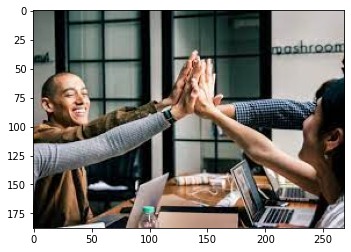

In [23]:
plt.imshow(img)
plt.show()

### 1.3 Load Data

In [26]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [29]:
import numpy as np 
from matplotlib import pyplot as plt

In [30]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 159 files belonging to 2 classes.


In [31]:
data_iterator = data.as_numpy_iterator()

In [49]:
#Get another batch from the iterator
batch = data_iterator.next()

In [50]:
# image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [51]:
# class 1 = sad people
# class 0 = happy people
batch[1]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

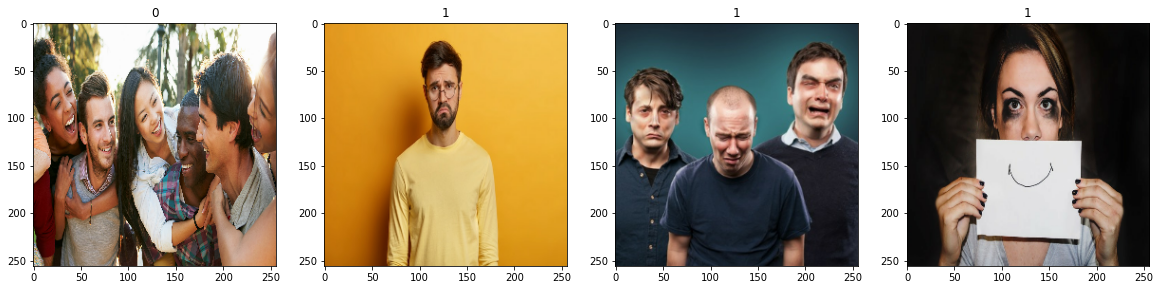

In [52]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])